### import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import the data

In [5]:
df = pd.read_csv('Mall_Customers.csv')

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.shape

(200, 5)

### separate the inour varible

In [8]:
x = df.iloc[:,[3,4]]

In [9]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

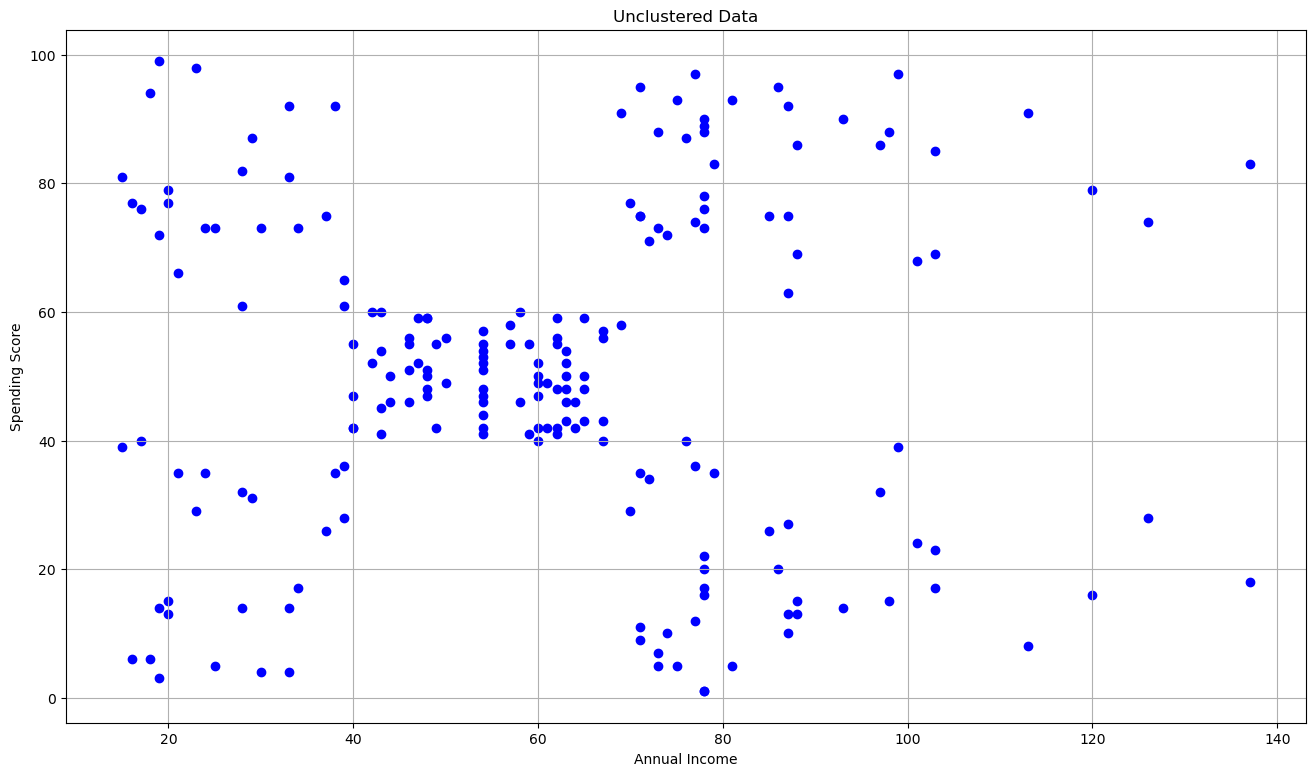

In [23]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker='o')

### Elbo method

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(random_state=0, n_clusters=3, n_init='auto')

In [27]:
y = km.fit_predict(x)

C:\Users\Pravin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [30]:
km.inertia_

106348.37306211119

In [34]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\Pravin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

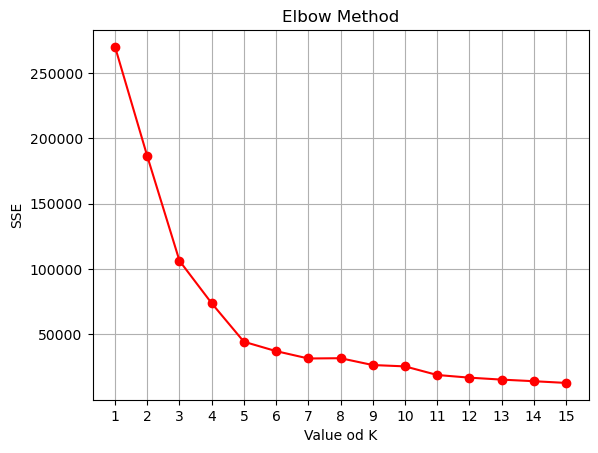

In [36]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Value od K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, color='red', marker = 'o')

In [38]:
km= KMeans(n_clusters=5, random_state=0, n_init='auto')

C:\Users\Pravin\AppData\Local\Temp\ipykernel_10584\1683080252.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


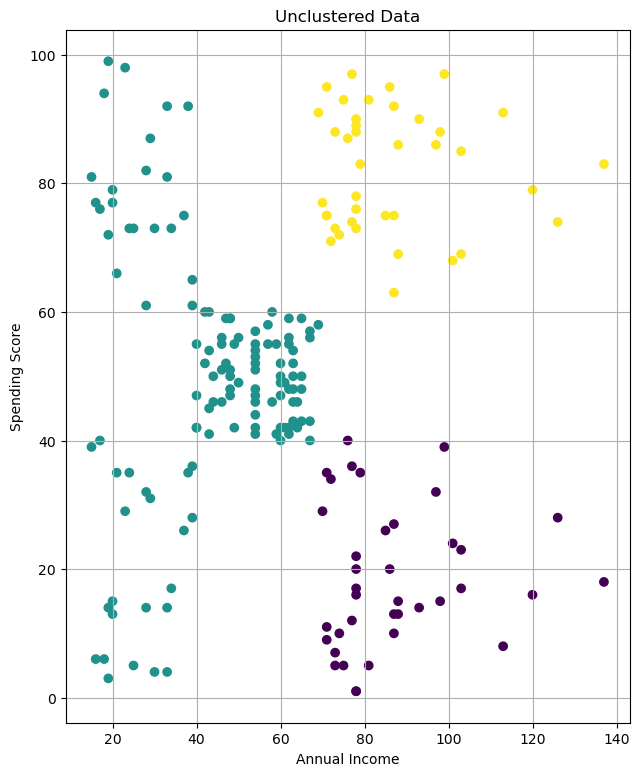

In [40]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker='o')

plt.subplot(1,2,2)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], marker='o', c = y)